# Prediction of User Rating by Analyzing Reviews

## Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

### Data Import

In [3]:
data = pd.read_csv('E:/filtered_yelp1.csv')
print(data.shape)
print(data.info())
data

(7996, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 10 columns):
Unnamed: 0     7996 non-null int64
review_id      7996 non-null object
user_id        7996 non-null object
business_id    7996 non-null object
stars          7996 non-null int64
date           7996 non-null object
text           7996 non-null object
useful         7996 non-null int64
funny          7996 non-null int64
cool           7996 non-null int64
dtypes: int64(5), object(5)
memory usage: 624.8+ KB
None


,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,568,0aJKuQSkxt4Gep-e2R6Zlg,dyhTHLIf6eWBvU78Y3T06A,BuJfxizrE5ZFZgOl2EHRKg,3,2008-02-19,"I'm a non-traditional girlfriend, so I always ...",15,27,24
1,4255,und_IbRFr2Rwpizt-kfZuw,Hm0diOkWwpo9zotlJlqMUQ,upgjUq616Yz1IvAvysDLWA,5,2017-09-08,Great food!\r\n\r\nThis restaurant isn't locat...,47,25,40
2,4259,gDxR9hgRWhp6jtZqgozqRA,Hm0diOkWwpo9zotlJlqMUQ,3fdtp-bzoE4ZgTakkcEBzQ,5,2017-09-14,Welcome to Fabulous Las Vegas!\r\n\r\nLas Vega...,33,20,35
3,4260,OboK9wH0IzH1IZryGFSgRQ,Hm0diOkWwpo9zotlJlqMUQ,BEtgRzNeXGAf0uQ-HuSyfA,5,2017-11-29,Delicious Ramen!\r\n\r\nRandomly found this pl...,35,19,35
4,4263,rH_hl29D7FX0xBVrfa9edA,Hm0diOkWwpo9zotlJlqMUQ,q3dJQtwZQrrurNT-1bNKgQ,5,2016-03-05,"Lunch at the Don's...\r\n\r\nWell, that's what...",28,18,23
5,4266,5guvjGIo7nQiatQg2-U_kg,Hm0diOkWwpo9zotlJlqMUQ,bvow46stEejfxnnqEKTAyQ,4,2017-11-25,Taste of Las Vegas!\r\n\r\nWe visited on Thank...,30,14,30
6,4267,fDtMRtHmnhm-YmYGLzxfrg,Hm0diOkWwpo9zotlJlqMUQ,X91rjC4EkH_3ZGY3ciIs8Q,4,2017-09-04,"Great Place, Yummy desserts!\r\n\r\nThis was m...",32,15,32
7,4268,WfmVQyAgAqkxkOfz9lSgpQ,Hm0diOkWwpo9zotlJlqMUQ,uu5AtMrz_94e8kk4Gixg9Q,4,2017-12-05,mmm! halo halo :)\r\n\r\nCame to this area on ...,37,18,36
8,4269,F30SpbMNX4u1JonzwtRT9Q,Hm0diOkWwpo9zotlJlqMUQ,n0SSApg8pIMu9uWr7IvxcQ,4,2016-11-10,I know it's rare but...\r\n\r\nAfter being let...,26,15,26
9,4270,yD_zR37iwd_zqonHEhnjTg,Hm0diOkWwpo9zotlJlqMUQ,I6ICIIZfZsp_J9hHmfhWhQ,4,2017-09-09,Parking fees in casinos on the Strip\r\n\r\nLo...,49,25,43


Unnamed is a reference data which is does not serve any purpose during our analysis, so we drop the feature from the dataset.

In [4]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,0aJKuQSkxt4Gep-e2R6Zlg,dyhTHLIf6eWBvU78Y3T06A,BuJfxizrE5ZFZgOl2EHRKg,3,2008-02-19,"I'm a non-traditional girlfriend, so I always ...",15,27,24
1,und_IbRFr2Rwpizt-kfZuw,Hm0diOkWwpo9zotlJlqMUQ,upgjUq616Yz1IvAvysDLWA,5,2017-09-08,Great food!\r\n\r\nThis restaurant isn't locat...,47,25,40
2,gDxR9hgRWhp6jtZqgozqRA,Hm0diOkWwpo9zotlJlqMUQ,3fdtp-bzoE4ZgTakkcEBzQ,5,2017-09-14,Welcome to Fabulous Las Vegas!\r\n\r\nLas Vega...,33,20,35
3,OboK9wH0IzH1IZryGFSgRQ,Hm0diOkWwpo9zotlJlqMUQ,BEtgRzNeXGAf0uQ-HuSyfA,5,2017-11-29,Delicious Ramen!\r\n\r\nRandomly found this pl...,35,19,35
4,rH_hl29D7FX0xBVrfa9edA,Hm0diOkWwpo9zotlJlqMUQ,q3dJQtwZQrrurNT-1bNKgQ,5,2016-03-05,"Lunch at the Don's...\r\n\r\nWell, that's what...",28,18,23


In [5]:
data.shape

(7996, 9)

The reviews that are in the form of string is taken as the independant variable X while the ratings described as 'stars' are taken as the target variable Y for which we want the models to make predictions. 

In [6]:
X = data['text']
Y = data['stars']
X[0]

'I\'m a non-traditional girlfriend, so I always forget what\'s expected of me during conventional gift giving holidays like Valentine\'s Day. And this year I totally neglected to get Mr. Man so much as a card. Dog house! (I thought we weren\'t celebrating! How was I to know that little sneaker was would bring a smile to my face with a cutesy, cheesy, tchotchky gift and card combo?)\r\n\r\nLittle did he know that I had an ace up my sleeve. An ace with lots and lots of titacular action. Bombshells! I know that nothing brings a smile to Mr. Man\'s face quicker than a pair of boobies, so we stopped by on Sunday for some sinful indulgence in an illusionary atmosphere. Being a non-traditionalist doesn\'t have to be a bad thing.\r\n\r\nSundays are 2 for 1 well drinks and domestic bottles before 7 pm, which is nice when it\'s $7.75 for a short gin and tonic. There\'s also no cover, an indication that Sunday nudity lures some guys that are reminiscent of your dad. Expect gentlemen in kahki shor

### Preprocessing

The lists X and Y are converted into arrays solely for convenience for text processing. 

In [7]:
Xdata = np.array(X)
Ydata = np.array(Y)

Text_process method includes three different routines for text processing.

1. Remove Stopwords: Words like articles, conjunctions and interjections are all removed.
2. POS tagging: Any word that is not verb, adverb or an adjective is removed
3. Stemming: Similar words are reduced to their base form. eg. quickly to quick

In [8]:
# text prcessing - stopwords, POS tagging and stemming
import string

def text_process(text):
    stemmer = PorterStemmer()
    nopunc = [char for char in text if char not in string.punctuation] #removes punctuations
    nopunc = ''.join(nopunc)
    wordLIst = [stemmer.stem(word.lower()) for word in nopunc.split() if word.lower() not in stopwords.words('english')] #Apply stemmer
    return wordLIst

The collection of review texts after text processing is given as input to the CountVectorizer. It generates a vector as output which has the entire vocabulary as its length and an integer count for each time the word has occurred in the review. In our dataset, the total of 7996 reviews resulted in a vocabulary of 41163 words after vectorization.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=text_process).fit(Xdata)

In [10]:
len(vectorizer.vocabulary_)

41163

In [11]:
Xdata =vectorizer.transform(Xdata)

In [12]:
print(Xdata.shape,Xdata.nnz)

(7996, 41163) 882763


In [13]:
Xdata.shape

(7996, 41163)

### Generating feature X2 - Average values

The weighted average of all the words in the vocabulary introduced by us is the average count of each word in the vocabulary is calculated and each review is assigned a weighted sum of these averages. It takes place in two steps.

First the average count of each word in reviews is calculated.

In [14]:
#Average Value Calculation from count vectorizer
def avgValue(X):
    avgVal =[]
    for i in range(Xdata.shape[1]):
        avg =0
        count =0
        for j in range(Xdata.shape[0]):
            if(X[j,i]>=1):
                avg = avg + Ydata[j]
                count = count + 1
        if(count == 0):
            avg = 0
        else:
            avg = avg/count
        avgVal.append([i, avg])
    return avgVal

In [36]:
avgVal = avgValue(Xdata) 

In [37]:
for a in avgVal:
    if(a[1] != 0 and a[1]>4):
        print(a[0], a[1])

1 4.66666666667
8 5.0
24 4.5
27 5.0
28 5.0
29 5.0
33 5.0
37 5.0
38 5.0
39 5.0
44 5.0
47 5.0
48 5.0
51 5.0
54 5.0
55 4.33333333333
65 5.0
71 5.0
77 5.0
81 5.0
83 5.0
87 5.0
90 5.0
91 5.0
99 5.0
100 5.0
106 5.0
107 5.0
108 5.0
117 5.0
118 5.0
123 5.0
124 5.0
130 4.75
131 5.0
134 5.0
135 5.0
137 5.0
138 5.0
139 5.0
141 5.0
146 4.375
147 5.0
149 5.0
153 4.57142857143
156 5.0
157 4.14285714286
158 5.0
159 4.18181818182
163 5.0
164 4.5
170 5.0
172 5.0
183 4.5
185 4.5
186 5.0
187 5.0
188 5.0
189 4.5
190 4.375
199 5.0
201 5.0
202 5.0
203 5.0
206 5.0
207 4.5
208 5.0
214 4.5
221 4.25
222 5.0
223 5.0
226 5.0
227 5.0
228 5.0
233 5.0
234 5.0
235 5.0
236 5.0
239 4.03225806452
242 5.0
244 5.0
248 5.0
255 5.0
256 5.0
266 5.0
268 5.0
270 4.33333333333
271 5.0
276 5.0
278 5.0
287 5.0
289 5.0
296 5.0
299 5.0
305 5.0
308 5.0
309 5.0
310 4.18867924528
311 5.0
312 5.0
313 5.0
317 5.0
318 5.0
320 5.0
322 4.5
324 5.0
325 4.24137931034
326 5.0
333 5.0
335 5.0
336 5.0
339 5.0
340 5.0
342 5.0
343 5.0
344 5.0
345

4223 4.5
4225 5.0
4232 5.0
4235 4.375
4239 5.0
4243 4.5
4246 5.0
4252 5.0
4256 5.0
4257 5.0
4261 5.0
4263 4.2380952381
4265 5.0
4267 5.0
4272 4.8
4280 5.0
4281 4.00943396226
4282 5.0
4283 5.0
4285 5.0
4286 4.2
4287 4.04615384615
4288 5.0
4290 5.0
4294 5.0
4295 4.16666666667
4301 4.5
4310 5.0
4317 5.0
4321 5.0
4322 5.0
4327 5.0
4329 4.07547169811
4331 4.28
4335 5.0
4337 5.0
4338 5.0
4340 4.5
4348 4.5
4349 4.66666666667
4350 4.52
4352 5.0
4355 5.0
4357 5.0
4360 4.4
4362 5.0
4364 5.0
4365 5.0
4369 5.0
4372 5.0
4374 5.0
4376 4.25
4377 4.25
4378 5.0
4382 5.0
4384 5.0
4385 5.0
4391 5.0
4392 5.0
4393 5.0
4394 5.0
4395 5.0
4396 5.0
4397 4.66666666667
4402 5.0
4403 5.0
4404 5.0
4407 4.5
4409 4.85714285714
4410 4.13636363636
4416 4.21764705882
4421 5.0
4422 4.17647058824
4424 4.5
4425 5.0
4426 5.0
4427 4.23076923077
4429 5.0
4431 5.0
4433 5.0
4436 4.16666666667
4437 5.0
4438 5.0
4440 5.0
4441 5.0
4445 5.0
4446 5.0
4448 4.45454545455
4453 5.0
4454 5.0
4456 4.2
4458 4.5
4459 5.0
4467 4.20689655172

6621 4.2
6623 5.0
6624 4.33333333333
6626 4.0625
6628 5.0
6629 5.0
6635 5.0
6640 5.0
6641 4.13333333333
6642 5.0
6644 4.5
6645 4.5
6646 5.0
6647 4.33333333333
6648 5.0
6649 4.8
6651 5.0
6655 5.0
6656 4.04278074866
6657 5.0
6660 5.0
6665 5.0
6674 4.09230769231
6677 5.0
6678 5.0
6684 4.5
6685 4.25
6687 5.0
6688 4.37931034483
6689 5.0
6690 5.0
6692 4.33333333333
6693 4.14634146341
6695 5.0
6696 5.0
6700 5.0
6704 5.0
6705 4.48387096774
6709 4.25862068966
6711 5.0
6717 4.4
6719 5.0
6720 4.28571428571
6721 5.0
6726 5.0
6728 5.0
6729 5.0
6739 4.12711864407
6742 5.0
6746 5.0
6748 5.0
6749 5.0
6752 5.0
6754 4.12
6755 4.66666666667
6756 4.5
6761 5.0
6762 4.33333333333
6764 5.0
6765 4.10526315789
6767 5.0
6768 4.27272727273
6771 4.03603603604
6772 5.0
6779 4.25
6781 5.0
6782 5.0
6785 5.0
6786 4.875
6787 5.0
6788 4.04761904762
6791 5.0
6792 5.0
6793 5.0
6794 5.0
6795 5.0
6797 5.0
6802 4.66666666667
6803 5.0
6807 5.0
6813 5.0
6815 4.16666666667
6819 5.0
6823 5.0
6829 5.0
6835 5.0
6837 4.17647058824

9643 5.0
9645 4.28571428571
9648 5.0
9649 4.4
9650 4.2
9655 5.0
9658 4.5
9662 5.0
9671 5.0
9678 4.5
9679 5.0
9681 5.0
9683 4.5
9684 5.0
9688 4.66666666667
9690 5.0
9691 5.0
9692 4.04301075269
9696 4.16666666667
9704 5.0
9705 5.0
9710 5.0
9712 5.0
9713 4.44827586207
9714 4.14285714286
9715 5.0
9716 4.29032258065
9719 4.5
9721 4.2
9723 5.0
9724 5.0
9730 4.18181818182
9731 4.5
9732 5.0
9737 4.5
9740 5.0
9741 4.33333333333
9750 5.0
9752 5.0
9755 5.0
9758 5.0
9760 5.0
9761 5.0
9762 4.66666666667
9763 5.0
9770 5.0
9772 5.0
9779 5.0
9781 5.0
9784 4.27272727273
9787 5.0
9789 5.0
9791 5.0
9792 5.0
9794 5.0
9795 5.0
9796 5.0
9801 4.15068493151
9805 5.0
9806 5.0
9808 4.27777777778
9810 5.0
9811 4.07692307692
9815 5.0
9817 4.71428571429
9820 5.0
9825 5.0
9827 4.11111111111
9830 4.04444444444
9835 4.4
9836 5.0
9843 5.0
9844 5.0
9848 5.0
9851 5.0
9853 5.0
9854 4.33333333333
9856 4.27586206897
9857 4.33333333333
9858 5.0
9862 5.0
9863 5.0
9864 5.0
9867 5.0
9868 5.0
9870 4.1198630137
9874 5.0
9875 4.3

12633 5.0
12634 5.0
12635 5.0
12639 4.5
12643 4.5
12646 4.5
12647 4.5
12649 4.75
12651 4.66666666667
12653 4.33333333333
12655 4.16666666667
12657 5.0
12659 5.0
12665 4.66666666667
12666 4.5
12668 5.0
12673 4.66666666667
12674 5.0
12675 4.07692307692
12680 5.0
12681 5.0
12683 5.0
12693 5.0
12694 5.0
12696 5.0
12703 4.28571428571
12706 4.44444444444
12708 4.29411764706
12709 4.5
12710 4.5
12713 4.16666666667
12722 4.5
12724 5.0
12729 4.24137931034
12733 5.0
12735 5.0
12736 4.66666666667
12740 5.0
12742 4.2
12743 4.33333333333
12745 4.2
12747 5.0
12754 4.5
12758 5.0
12759 4.5
12762 5.0
12765 4.83333333333
12768 4.16666666667
12769 4.57142857143
12770 5.0
12772 5.0
12774 4.57142857143
12775 5.0
12777 5.0
12778 5.0
12780 4.05263157895
12783 4.15384615385
12784 5.0
12785 4.66666666667
12789 5.0
12790 5.0
12792 5.0
12793 4.33333333333
12795 4.55555555556
12799 5.0
12802 4.25
12807 5.0
12809 5.0
12812 5.0
12819 4.4
12820 4.35
12823 5.0
12828 4.01612903226
12829 5.0
12832 4.30769230769
12836 5

14992 5.0
14995 4.5
15000 5.0
15002 4.29411764706
15004 5.0
15006 4.66666666667
15010 5.0
15012 5.0
15013 5.0
15016 5.0
15017 4.5
15018 5.0
15019 5.0
15022 5.0
15023 5.0
15024 5.0
15025 5.0
15026 5.0
15028 4.32857142857
15035 5.0
15036 5.0
15037 4.66666666667
15040 5.0
15041 5.0
15048 5.0
15049 5.0
15050 4.5
15051 4.08620689655
15053 4.16129032258
15056 5.0
15057 5.0
15065 4.66666666667
15067 5.0
15070 4.25
15075 4.1875
15076 5.0
15077 4.5
15078 4.5
15082 5.0
15084 5.0
15087 5.0
15089 5.0
15091 5.0
15092 5.0
15094 4.10344827586
15097 4.09090909091
15102 4.66666666667
15103 5.0
15108 5.0
15110 4.4
15113 5.0
15117 5.0
15118 4.25
15124 5.0
15125 5.0
15130 5.0
15131 4.2
15132 4.83333333333
15134 5.0
15139 4.14285714286
15140 5.0
15141 5.0
15144 4.1
15149 5.0
15150 5.0
15153 5.0
15154 5.0
15155 4.11155913978
15156 5.0
15158 5.0
15166 5.0
15172 4.33333333333
15176 4.21052631579
15180 5.0
15182 4.5
15185 4.25
15189 5.0
15194 5.0
15208 5.0
15214 4.33333333333
15217 4.18
15221 5.0
15223 4.33333

17428 5.0
17429 5.0
17433 5.0
17434 5.0
17436 5.0
17437 5.0
17439 5.0
17444 5.0
17445 5.0
17448 5.0
17453 5.0
17456 5.0
17459 4.2
17462 5.0
17463 5.0
17465 5.0
17467 5.0
17468 5.0
17472 4.5
17483 4.2
17484 5.0
17487 4.66666666667
17492 5.0
17496 5.0
17499 4.5
17500 5.0
17501 5.0
17502 5.0
17508 4.5
17509 5.0
17510 5.0
17511 5.0
17517 4.07142857143
17519 4.28571428571
17521 5.0
17523 4.18881118881
17525 4.14285714286
17528 4.5
17530 5.0
17531 5.0
17532 4.30769230769
17533 4.5
17535 4.25
17536 5.0
17542 4.5
17544 5.0
17545 5.0
17549 5.0
17552 4.20930232558
17555 4.5
17556 5.0
17557 5.0
17559 4.46963562753
17563 5.0
17567 5.0
17572 5.0
17574 4.4
17578 5.0
17586 5.0
17591 5.0
17592 5.0
17593 5.0
17595 5.0
17597 5.0
17599 4.30476190476
17600 5.0
17601 4.30769230769
17602 5.0
17603 5.0
17604 5.0
17606 4.2380952381
17613 5.0
17614 4.5
17619 4.36363636364
17621 5.0
17624 4.5
17625 4.2
17628 5.0
17629 5.0
17631 5.0
17638 5.0
17640 4.09090909091
17642 5.0
17643 4.38461538462
17647 4.0625
17649 5

19779 5.0
19780 5.0
19782 5.0
19787 5.0
19789 5.0
19791 4.08
19792 5.0
19793 4.18644067797
19804 4.33333333333
19813 5.0
19818 5.0
19828 4.14084507042
19830 4.16666666667
19833 4.07
19834 5.0
19836 5.0
19837 5.0
19858 5.0
19867 5.0
19868 5.0
19871 5.0
19874 5.0
19876 4.21428571429
19879 5.0
19882 5.0
19883 4.75
19892 4.5
19894 4.07692307692
19896 5.0
19899 4.41975308642
19900 4.33333333333
19901 5.0
19906 5.0
19908 5.0
19912 4.66666666667
19913 4.54545454545
19915 4.08108108108
19917 5.0
19926 4.4
19933 4.33333333333
19937 4.36956521739
19941 5.0
19946 4.66666666667
19947 5.0
19949 5.0
19950 4.03783783784
19954 5.0
19960 4.75
19965 5.0
19967 5.0
19968 5.0
19971 4.15384615385
19985 5.0
19986 5.0
19990 5.0
19993 5.0
19995 5.0
19996 4.15625
19999 5.0
20000 5.0
20002 5.0
20007 5.0
20008 5.0
20010 5.0
20015 5.0
20016 4.39130434783
20019 5.0
20021 4.5
20024 4.28571428571
20026 5.0
20028 5.0
20031 5.0
20032 4.5
20034 5.0
20042 4.04807692308
20045 5.0
20051 5.0
20056 5.0
20059 5.0
20063 5.0
20

21833 5.0
21834 5.0
21837 5.0
21843 4.5
21844 4.00934579439
21849 5.0
21851 5.0
21852 5.0
21853 4.29166666667
21854 4.33333333333
21856 5.0
21861 5.0
21862 5.0
21863 5.0
21870 5.0
21874 5.0
21876 4.5
21879 5.0
21881 4.8
21883 5.0
21887 5.0
21889 4.5
21890 4.07142857143
21894 5.0
21895 4.06276150628
21896 4.08333333333
21898 4.16666666667
21902 4.5
21904 4.66666666667
21908 5.0
21911 5.0
21912 4.25
21913 5.0
21914 4.66666666667
21916 4.2
21917 4.28571428571
21918 5.0
21919 4.31818181818
21925 4.5
21926 5.0
21927 4.4
21928 4.5
21934 4.33333333333
21935 5.0
21937 5.0
21941 4.25
21947 5.0
21948 5.0
21952 5.0
21954 5.0
21962 4.5
21969 5.0
21970 5.0
21972 5.0
21973 4.5
21977 5.0
21980 5.0
21982 4.75
21983 5.0
21984 5.0
21986 5.0
21990 5.0
21991 4.33333333333
21995 5.0
21996 4.6
21998 5.0
22000 5.0
22004 5.0
22007 4.5
22011 4.66666666667
22012 5.0
22013 5.0
22015 4.5
22016 4.33333333333
22023 5.0
22024 4.45833333333
22026 5.0
22035 4.07692307692
22041 4.34146341463
22044 4.66666666667
22045 4

24768 5.0
24769 4.16666666667
24772 5.0
24775 5.0
24781 5.0
24784 5.0
24787 5.0
24791 5.0
24792 4.36363636364
24794 4.5
24796 4.4
24797 4.5
24798 5.0
24800 5.0
24801 5.0
24803 5.0
24806 5.0
24807 5.0
24809 5.0
24810 5.0
24812 5.0
24814 4.66666666667
24817 5.0
24826 5.0
24827 4.625
24828 5.0
24831 4.5
24835 5.0
24836 5.0
24840 5.0
24844 5.0
24846 5.0
24847 5.0
24848 5.0
24849 4.5
24850 5.0
24851 5.0
24854 4.5
24858 4.08695652174
24860 5.0
24861 4.33333333333
24864 4.2
24865 4.5
24869 5.0
24871 4.5
24876 4.33333333333
24877 4.5
24879 4.33333333333
24882 5.0
24883 5.0
24886 5.0
24887 5.0
24889 5.0
24890 4.75
24893 4.5
24900 5.0
24901 4.5
24903 4.5
24905 4.5
24906 5.0
24907 4.5
24908 5.0
24912 5.0
24913 5.0
24919 4.66666666667
24921 4.66666666667
24923 5.0
24926 4.14285714286
24928 5.0
24929 5.0
24931 4.5
24935 4.30508474576
24940 4.05507246377
24941 5.0
24943 5.0
24944 4.06206896552
24946 5.0
24947 5.0
24948 4.35294117647
24953 5.0
24954 5.0
24959 4.33333333333
24960 5.0
24961 5.0
24962 4

27423 5.0
27424 5.0
27425 4.2
27430 4.08333333333
27436 4.44444444444
27438 5.0
27439 5.0
27444 4.25
27451 5.0
27452 4.16666666667
27457 4.25
27459 5.0
27462 5.0
27465 5.0
27467 5.0
27468 5.0
27474 4.5
27482 5.0
27483 4.5
27486 5.0
27488 5.0
27490 5.0
27491 5.0
27492 4.57142857143
27495 5.0
27508 5.0
27509 4.33333333333
27511 4.5
27513 5.0
27519 4.075
27521 4.09259259259
27522 5.0
27524 5.0
27526 4.66666666667
27527 5.0
27533 4.06666666667
27535 4.5
27537 4.08333333333
27538 5.0
27539 5.0
27542 4.26923076923
27546 5.0
27550 5.0
27552 5.0
27553 4.01111111111
27556 5.0
27557 4.30434782609
27559 4.5
27560 4.46153846154
27562 5.0
27563 5.0
27567 5.0
27568 5.0
27572 5.0
27573 4.2
27575 5.0
27584 4.375
27586 4.5
27588 4.5
27590 4.5
27594 5.0
27612 5.0
27613 5.0
27619 5.0
27621 4.71428571429
27623 4.5
27624 5.0
27626 5.0
27627 5.0
27628 5.0
27632 4.66666666667
27637 4.1935483871
27638 4.109375
27639 4.11475409836
27640 5.0
27642 4.5
27643 4.09333333333
27644 5.0
27647 4.13043478261
27650 4.35

29861 5.0
29863 5.0
29866 4.25
29867 5.0
29868 4.5
29870 5.0
29871 4.27777777778
29872 5.0
29881 4.25714285714
29882 5.0
29883 5.0
29884 5.0
29885 5.0
29887 5.0
29889 5.0
29890 4.47368421053
29891 5.0
29892 5.0
29898 5.0
29901 4.5
29902 5.0
29907 5.0
29909 5.0
29910 5.0
29911 5.0
29914 4.5
29915 5.0
29916 5.0
29917 5.0
29920 5.0
29921 4.5
29922 4.63636363636
29924 5.0
29928 5.0
29937 4.6
29938 4.5
29939 5.0
29945 5.0
29947 5.0
29950 5.0
29952 5.0
29957 4.30769230769
29959 5.0
29960 4.25
29963 4.5
29968 4.5
29969 5.0
29970 5.0
29974 5.0
29975 4.4
29977 5.0
29979 5.0
29980 5.0
29981 5.0
29982 4.23958333333
29985 5.0
29986 4.5
29987 5.0
29990 4.4
29991 5.0
30001 5.0
30002 4.5
30003 4.5
30010 4.66666666667
30011 5.0
30012 5.0
30014 4.33333333333
30015 5.0
30018 5.0
30019 5.0
30021 4.75
30022 5.0
30026 5.0
30032 5.0
30037 4.5
30054 5.0
30056 4.25
30057 5.0
30058 5.0
30059 5.0
30061 5.0
30066 5.0
30067 5.0
30073 5.0
30075 5.0
30077 5.0
30078 5.0
30085 5.0
30086 5.0
30087 5.0
30090 5.0
30092 

32534 4.5
32535 5.0
32536 4.11956521739
32537 5.0
32538 5.0
32539 5.0
32543 5.0
32544 5.0
32547 4.5
32548 5.0
32549 4.5
32550 4.5
32557 5.0
32558 5.0
32562 5.0
32565 5.0
32572 5.0
32574 5.0
32578 5.0
32581 4.29166666667
32582 5.0
32583 4.75
32586 5.0
32589 5.0
32590 5.0
32592 5.0
32595 4.29411764706
32603 5.0
32606 4.6
32611 4.125
32612 4.5
32613 4.08695652174
32614 4.5
32615 5.0
32619 4.15476190476
32620 5.0
32624 4.25
32627 5.0
32632 5.0
32635 4.21428571429
32636 5.0
32638 4.5
32641 5.0
32642 5.0
32645 4.21568627451
32647 4.26923076923
32648 5.0
32650 5.0
32652 5.0
32655 5.0
32659 5.0
32663 4.5
32664 4.25
32665 4.42857142857
32668 5.0
32672 4.5
32676 5.0
32677 4.0157480315
32680 5.0
32681 4.5
32684 4.04970760234
32687 5.0
32691 5.0
32692 5.0
32693 5.0
32696 4.1
32698 5.0
32701 4.2
32705 5.0
32710 5.0
32712 4.02127659574
32714 4.66666666667
32717 5.0
32718 5.0
32719 5.0
32722 4.5
32724 4.07142857143
32725 5.0
32727 4.66666666667
32730 5.0
32731 5.0
32732 5.0
32737 4.5
32738 5.0
32739 

34903 5.0
34910 5.0
34921 5.0
34923 5.0
34924 4.66666666667
34928 5.0
34929 4.04166666667
34931 4.04417670683
34932 5.0
34933 5.0
34935 4.8
34941 4.5
34942 5.0
34943 5.0
34946 4.5
34947 4.5
34948 5.0
34950 5.0
34952 5.0
34955 5.0
34961 5.0
34962 4.02173913043
34965 4.8
34971 5.0
34973 5.0
34974 4.67164179104
34976 5.0
34979 4.66666666667
34981 4.5
34982 5.0
34984 5.0
34986 5.0
34990 5.0
34991 4.5
34995 5.0
34999 4.5
35000 5.0
35001 5.0
35008 4.125
35009 5.0
35010 5.0
35012 5.0
35020 4.2
35025 5.0
35026 4.5
35028 5.0
35029 4.33333333333
35030 4.33333333333
35031 4.5
35032 5.0
35038 5.0
35048 5.0
35051 5.0
35053 4.12107623318
35055 5.0
35056 5.0
35057 4.25
35059 5.0
35061 5.0
35062 5.0
35065 4.75
35067 4.33333333333
35069 4.3768115942
35070 5.0
35071 5.0
35072 4.33333333333
35074 4.5
35075 5.0
35077 4.22222222222
35078 5.0
35082 5.0
35084 4.09090909091
35085 5.0
35086 5.0
35089 5.0
35090 4.33333333333
35093 4.02091254753
35097 5.0
35099 5.0
35109 5.0
35111 5.0
35113 4.5
35114 5.0
35117 4

38086 5.0
38089 4.33333333333
38092 4.5
38097 5.0
38098 4.25
38107 4.33333333333
38109 4.33333333333
38111 5.0
38128 5.0
38130 5.0
38131 4.09090909091
38135 5.0
38136 4.23076923077
38137 5.0
38140 4.66666666667
38142 5.0
38147 4.61538461538
38149 5.0
38153 5.0
38154 4.66666666667
38155 5.0
38161 4.33333333333
38162 5.0
38164 5.0
38167 5.0
38168 5.0
38173 5.0
38175 5.0
38176 5.0
38177 4.22222222222
38180 4.2
38181 4.33333333333
38182 4.66666666667
38185 5.0
38188 5.0
38191 5.0
38200 4.33333333333
38201 5.0
38207 4.23676012461
38211 5.0
38212 5.0
38217 5.0
38219 5.0
38222 5.0
38223 5.0
38227 5.0
38229 5.0
38230 5.0
38237 5.0
38241 5.0
38250 5.0
38251 4.33333333333
38255 4.66666666667
38259 5.0
38264 5.0
38265 5.0
38266 4.66666666667
38272 5.0
38276 4.5
38277 5.0
38278 5.0
38285 5.0
38286 5.0
38289 5.0
38290 4.3
38295 4.42857142857
38298 4.33333333333
38302 5.0
38315 4.33333333333
38323 4.5
38325 5.0
38326 5.0
38329 5.0
38332 4.5
38333 5.0
38335 4.14285714286
38339 5.0
38348 5.0
38362 5.0

40483 4.23595505618
40485 5.0
40486 5.0
40488 5.0
40491 5.0
40497 5.0
40499 5.0
40502 5.0
40503 5.0
40508 4.25
40512 5.0
40514 4.33333333333
40516 5.0
40517 5.0
40518 5.0
40519 5.0
40521 5.0
40523 5.0
40524 4.5
40525 4.16666666667
40526 5.0
40527 5.0
40528 5.0
40531 5.0
40532 5.0
40536 4.33333333333
40537 5.0
40538 5.0
40540 5.0
40541 4.5
40542 5.0
40550 4.06741573034
40551 4.25
40552 5.0
40555 5.0
40556 5.0
40558 5.0
40560 5.0
40561 5.0
40564 5.0
40565 5.0
40569 5.0
40571 5.0
40572 5.0
40574 4.25
40576 4.25
40580 5.0
40582 4.24324324324
40586 4.5
40587 5.0
40593 5.0
40594 5.0
40601 4.1
40602 5.0
40603 5.0
40604 5.0
40605 5.0
40609 5.0
40610 5.0
40612 5.0
40620 4.12903225806
40623 5.0
40626 5.0
40627 5.0
40628 5.0
40639 5.0
40640 5.0
40650 5.0
40651 5.0
40652 4.125
40653 4.28571428571
40659 5.0
40663 4.4
40668 5.0
40669 5.0
40673 5.0
40674 4.5
40675 5.0
40680 4.2
40681 5.0
40683 4.58823529412
40686 5.0
40687 5.0
40690 5.0
40691 4.5
40692 5.0
40694 4.5
40695 4.16666666667
40698 5.0
4070

Since the computational time is long for this method, the result is backed up in a text file so it can retrieved whenever the need arises.

In [38]:
file = open('E:/avgVal.txt', 'w')

for item in avgVal:
    file.write("%s\n" % item)
    
file.close()

In [15]:
arrays = pd.read_csv('E:/avgVal.txt')

In [16]:
avgValue = arrays['score'].tolist()
#avgValue = avgVal

In [17]:
avgValue

[2.40625,
 4.666666666666667,
 1.0,
 1.0,
 4.0,
 1.0,
 1.0,
 1.0,
 5.0,
 1.0,
 1.5,
 1.5,
 3.0,
 3.4444444444444446,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 1.0,
 1.0,
 1.0,
 4.0,
 3.0,
 4.5,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 1.0,
 4.0,
 4.0,
 5.0,
 4.0,
 1.5,
 3.7142857142857135,
 5.0,
 5.0,
 5.0,
 4.0,
 1.0,
 2.0,
 3.6666666666666665,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 1.0,
 4.0,
 5.0,
 4.333333333333333,
 3.0,
 4.0,
 4.0,
 4.0,
 3.5,
 1.0,
 4.0,
 4.0,
 4.0,
 5.0,
 3.0,
 4.0,
 1.0,
 4.0,
 4.0,
 5.0,
 2.5,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 1.0,
 4.0,
 4.0,
 5.0,
 3.0,
 5.0,
 4.0,
 4.0,
 4.0,
 5.0,
 3.9090909090909087,
 4.0,
 5.0,
 5.0,
 3.542119565217391,
 3.734455958549223,
 3.679611650485437,
 3.430379746835443,
 3.1764705882352935,
 4.0,
 4.0,
 5.0,
 5.0,
 3.5,
 3.6666666666666665,
 4.0,
 4.0,
 2.5,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 3.333333333333333,
 1.0,
 1.0,
 4.0,
 2.0,
 5.0,
 5.0,
 3.0,
 2.0,
 4.0,
 3.0,
 5.0,
 5.0,
 3.5,
 2.75,
 4.0,
 4.0,
 3.727272727272727,
 4.75,
 5.0,


Step two is the mapping of the average count of each word calculated in the previous step to all the reviews and arriving at a numeric data of weighted score for each review. 

In [18]:
#the weighted score calculated from the average value
def calc_weighted_scores(X):
    weighted_scores = []
    for i in range (X.shape[0]):
        score = 0
        count = 0
        for j in range (X.shape[1]):
            if(X[i,j] >= 1):
                count = count + 1
                score = score + avgValue[j]
        if(count >=1):
            weighted_scores.append(score/count)
        else:
            weighted_scores.append(score)
    return weighted_scores

In [54]:
logistic_X2 = calc_weighted_scores(Xdata)

In [55]:
file = open('E:/weightSum.txt', 'w')

for item in logistic_X2:
    file.write("%s\n" % item)
    
file.close()

In [23]:
arrays = pd.read_csv('E:/weightSum.txt')

In [25]:
logistic_X2 = arrays['score'].tolist()
#avgValue = avgVal
logistic_X2

[3.647588788191293,
 3.912915859338818,
 3.8636540033928832,
 3.972522037286393,
 3.92001288708139,
 3.88152417328556,
 3.8219544577049223,
 3.8401473641841,
 3.694044938531884,
 3.817589785337708,
 3.955512412894632,
 3.5711334681594566,
 3.890635572831335,
 3.7691093423468622,
 3.7845186881634754,
 3.8958523712571047,
 3.823023474680847,
 3.8098134615239787,
 3.717899774877112,
 3.6119129988940455,
 3.932987156652033,
 3.928666545224238,
 3.9245511214818594,
 3.9236398816182505,
 3.912958163948692,
 3.7762777847882485,
 3.877453072056479,
 3.906838519881585,
 3.882248227668183,
 3.936478890192274,
 3.910053650495462,
 3.90982644768646,
 3.8502137256705367,
 3.890392101778255,
 3.734623659606715,
 3.883357307089909,
 3.8676386086257297,
 3.8094300984455485,
 3.860663722461812,
 3.911414271580557,
 3.6631684639769744,
 3.9372464241572103,
 3.8924980164354857,
 3.963216471814435,
 3.938564938988401,
 3.7673988510450895,
 3.9958682991132766,
 3.5962488850707484,
 3.992601185783632,
 3.95

### Generating feature X1 - AFINN score

AFINN is a list of English words rated for valence with an integer between minus five (negative) and plus five (positive). These rated scores are available into versions and we have opted for the latest version of ‘AFINN-111’. We use this file to map the reviews in the form of strings to their corresponding AFINN scores based on the words present in the reviews. 

In [26]:
import math
import re
import sys

In [27]:
fnAFINN = 'AFINN/AFINN-111.txt'
afinn = dict(map(lambda s: (s[0],int(s[1])), [ ws.strip().split('\t') for ws in open(fnAFINN) ]))
pattern_split = re.compile(r"\W+")

In [28]:
def afinn_score(text):
    textArray = np.array(text)
    totalSentiments = []
    for i in range (textArray.shape[0]):
        words = pattern_split.split(textArray[i].lower())
        sentiments = list(map(lambda word: afinn.get(word, 0), words))
        #print(sentiments)
        if sentiments:
            # How should you weight the individual word sentiments? 
            # You could do N, sqrt(N) or 1 for example. Here I use sqrt(N)
            sentiment = float(sum(sentiments))/math.sqrt(len(sentiments))
        
        else:
            sentiment = 0
        totalSentiments.append(sentiment)
    return totalSentiments

In [29]:
logistic_X1 = afinn_score(data['text'])

In [30]:
logistic_X1

[0.8041806928957865,
 1.090550508469293,
 1.762817881041723,
 1.5811388300841898,
 0.6508140266182866,
 1.7539302113940218,
 1.692997943949301,
 1.0462776733243282,
 0.0,
 1.15,
 1.1,
 -0.41015155621479793,
 2.633952337843794,
 1.2850792082313727,
 1.1846977555181846,
 2.6140645235596867,
 0.5879747322073337,
 2.2274140590734226,
 2.0977424913962683,
 0.40824829046386296,
 2.032002032003048,
 1.2742087810941234,
 1.5992254762521154,
 1.9653653462412553,
 1.9122542764785357,
 0.44791400876468346,
 0.16317848796612636,
 1.3965944975103513,
 1.5555555555555556,
 1.349852742293029,
 2.174023448069479,
 0.9012626521891645,
 0.6074567392307869,
 1.7557524502806956,
 0.0,
 1.4431483518177646,
 1.161115590732371,
 1.3664625560228307,
 1.249480261463753,
 0.6731890674983151,
 1.1303883305208782,
 1.5735915849388864,
 2.084219669613948,
 2.1226745220209295,
 1.7888543819998317,
 0.780398972571708,
 0.17407765595569785,
 0.0,
 -0.07761505257063328,
 0.2176428750330035,
 0.0,
 0.15617376188860607,

### Merging X1 and X2 to form the input array XTotal

In [31]:
array_X1 = np.array(logistic_X1).reshape(-1,1)
array_X2 = np.array(logistic_X2).reshape(-1,1)

array_XTotal = np.hstack((array_X1, array_X2))
array_XTotal

array([[ 0.80418069,  3.64758879],
       [ 1.09055051,  3.91291586],
       [ 1.76281788,  3.863654  ],
       ..., 
       [ 0.85749293,  3.79831988],
       [-0.1796053 ,  3.57291922],
       [-0.27272727,  3.47520182]])

### Experiment 1

In this experiment, we take both AFFIN score and average value merged as inputs to the logistic regression Classifier model. We split the input for training and testing in 80% and 20% respectively. We also oversample the data for better results. Finally, the accuracy and the evaluation matrix are obtained based on the predictions.

We also setup Logistic model for multiclass classifier by setting the parameters multi_class, max_iter, solver and c as multinomial, 1000, newton-cg and 1e5 respectively.


In [39]:
from sklearn.model_selection import train_test_split

X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(array_XTotal, Ydata, test_size=0.2, random_state=101)

In [98]:
Y_test_L.shape

(1600,)

In [40]:
#Oversampling
from imblearn.over_sampling import SMOTE

X_resampled_L, Y_resampled_L = SMOTE().fit_sample(X_train_L, Y_train_L)
X_resampled_L.shape

(11795, 2)

In [41]:
from collections import Counter
print(sorted(Counter(Y_resampled_L).items()))

[(1, 2359), (2, 2359), (3, 2359), (4, 2359), (5, 2359)]


In [85]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class = 'multinomial', solver= 'newton-cg', max_iter=1000, C = 1e5)

In [86]:
logisticRegr.fit(X_resampled_L, Y_resampled_L)
predictions = logisticRegr.predict(X_test_L)

In [87]:
score_accuracy = logisticRegr.score(X_test_L, Y_test_L)
print(score_accuracy)
print(predictions)

0.525
[5 5 4 ..., 3 3 3]


In [46]:
from sklearn.metrics import accuracy_score
#predictionsTrain = logisticRegr.predict(X_train_L)
score_accuracy = accuracy_score(Y_test_L, predictions)
print(score_accuracy)

0.48625


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix1 = confusion_matrix(Y_test_L, predictions)
print(confusion_matrix1)
print('\n')
print(classification_report(Y_test_L, predictions))

[[131  35   3   0   0]
 [ 13  34  22   1   0]
 [  4  38 121  51   9]
 [  0  12 107 188 218]
 [  0  22  74 151 366]]


             precision    recall  f1-score   support

          1       0.89      0.78      0.83       169
          2       0.24      0.49      0.32        70
          3       0.37      0.54      0.44       223
          4       0.48      0.36      0.41       525
          5       0.62      0.60      0.61       613

avg / total       0.55      0.53      0.53      1600



In [88]:
def CalCorrectClassified(theArray):
    tp = 0;
    fp = 0;
    for i in range (theArray.shape[0]):
        for j in range (theArray.shape[1]):
            if (i == j):
                tp = tp + theArray[i][j]
            else:
                fp = fp + theArray[i][j]

    return tp, fp

In [92]:
trueP1,falseP1 = CalCorrectClassified(confusion_matrix1)

In [117]:
print(trueP1," ", falseP1)

840   760


In [109]:
# Function for calculation of correctly classified and incorrectly classified values for each class
def CalCorrectClassifiedForEachClass(theArray):
    tpArray = []
    fpArray = []
    for i in range (theArray.shape[0]):
        tp = 0;
        fp = 0;
        for j in range (theArray.shape[1]):
            if (i == j):
                tp = tp + theArray[i][j]
            else:
                fp = fp + theArray[i][j]
        
        tpArray.append(tp)
        fpArray.append(fp)

    return tpArray, fpArray

In [110]:
tpArray1,fpArray1 = CalCorrectClassifiedForEachClass(confusion_matrix1)

In [112]:
tpArray1

[131, 34, 121, 188, 366]

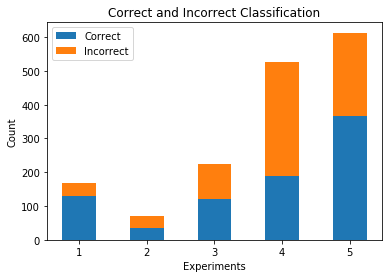

In [115]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
truePositives = tpArray1
trueNegatives = fpArray1

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, truePositives, width)
p2 = plt.bar(ind, trueNegatives, width, bottom=truePositives)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('1', '2','3','4','5'))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

### Experiment 2

In this experiment, we take only the feature that we introduced,  the weighted_scores, as inputs to the logistic regression classifier model. Just as before, we oversample the data for better results After training, the predictions are made on the test data and the accuracy and the evaluation matrix are obtained.

Same as before  the  Logistic model is setup for multiclass classifier by setting the parameters such as multi_class, max_iter, solver and c to multinomial, 1000, newton-cg and 1e5 respectively.


In [84]:
X_train_L1, X_test_L1, Y_train_L1, Y_test_L1 = train_test_split(array_X2, Ydata, test_size=0.2, random_state=101)
logisticRegr1 = LogisticRegression(multi_class = 'multinomial', solver= 'newton-cg', max_iter=1000, C =1e5)
logisticRegr1.fit(X_train_L1, Y_train_L1)
predictions1 = logisticRegr1.predict(X_test_L1)
score_accuracy1 = logisticRegr1.score(X_test_L1, Y_test_L1)
print(score_accuracy1)
print(predictions1)

0.531875
[5 5 4 ..., 4 4 3]


In [95]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix2 = confusion_matrix(Y_test_L1, predictions1)
print(confusion_matrix2)
print('\n')
print(classification_report(Y_test_L1, predictions1))

[[150   4  13   2   0]
 [ 24   6  28  12   0]
 [ 11   7  41 152  12]
 [  2   2  18 255 248]
 [  2   1  31 180 399]]


             precision    recall  f1-score   support

          1       0.79      0.89      0.84       169
          2       0.30      0.09      0.13        70
          3       0.31      0.18      0.23       223
          4       0.42      0.49      0.45       525
          5       0.61      0.65      0.63       613

avg / total       0.51      0.53      0.52      1600



In [96]:
trueP2,falseP2 = CalCorrectClassified(confusion_matrix2)

In [118]:
print(trueP2," ", falseP2)

851   749


In [120]:
tpArray2,fpArray2 = CalCorrectClassifiedForEachClass(confusion_matrix2)

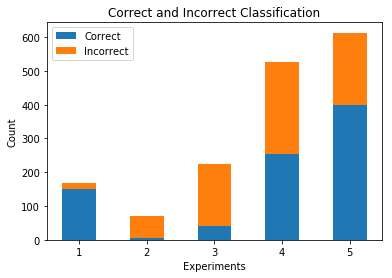

In [122]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
truePositives = tpArray2
trueNegatives = fpArray2

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, truePositives, width)
p2 = plt.bar(ind, trueNegatives, width, bottom=truePositives)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('1', '2','3','4','5'))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

Below is a graph showing the results for both Experiments related to Logistic Classifier. The graphs demonstrate the correct and incorrectly classified number of instances.

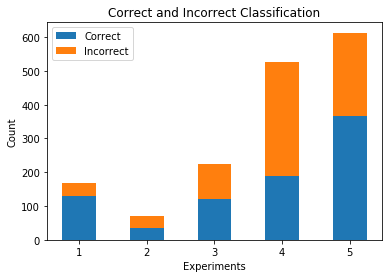

In [121]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
truePositives = tpArray1
trueNegatives = fpArray1

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, truePositives, width)
p2 = plt.bar(ind, trueNegatives, width, bottom=truePositives)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('1', '2','3','4','5'))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()

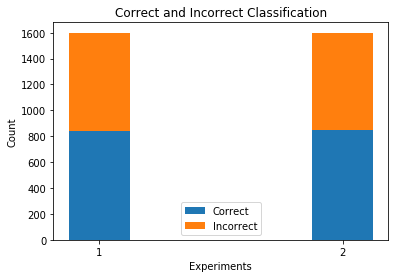

In [116]:
import numpy as np
import matplotlib.pyplot as plt


N = 2
truePositives = (trueP1, trueP2)
trueNegatives = (falseP1, falseP2)

ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, truePositives, width)
p2 = plt.bar(ind, trueNegatives, width, bottom=truePositives)

plt.ylabel('Count')
plt.xlabel('Experiments')
plt.title('Correct and Incorrect Classification')
plt.xticks(ind, ('1', '2'))
plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))

plt.show()